<a href="https://colab.research.google.com/github/SuminBae97/MachineLearning/blob/master/DeepAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2019/March/5c88a3f1_household-electric-power-consumption/household-electric-power-consumption.zip

--2022-03-11 01:35:21--  https://s3.amazonaws.com/video.udacity-data.com/topher/2019/March/5c88a3f1_household-electric-power-consumption/household-electric-power-consumption.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.70.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.70.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20805339 (20M) [application/zip]
Saving to: ‘household-electric-power-consumption.zip’

household-electric- 100%[===================>]  19.84M  17.5MB/s    in 1.1s    

2022-03-11 01:35:23 (17.5 MB/s) - ‘household-electric-power-consumption.zip’ saved [20805339/20805339]



In [6]:
! unzip household-electric-power-consumption

Archive:  household-electric-power-consumption.zip
  inflating: household_power_consumption.txt  


In [7]:
with open('household_power_consumption.txt') as file:
    for line in range(10):
        print(next(file))

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000

16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000

16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000

16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000

16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000

16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000

16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000

16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000

16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000



In [8]:
type(file)

_io.TextIOWrapper

In [9]:
import pandas as pd

In [10]:
 df = pd.read_csv('household_power_consumption.txt', sep=';',
                                                    parse_dates={'Date-Time': ['Date', 'Time']},
                                                    infer_datetime_format=True,
                                                    low_memory=False,
                                                    na_values=['nan', '?'],
                                                    index_col='Date-Time')

In [11]:
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date-Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


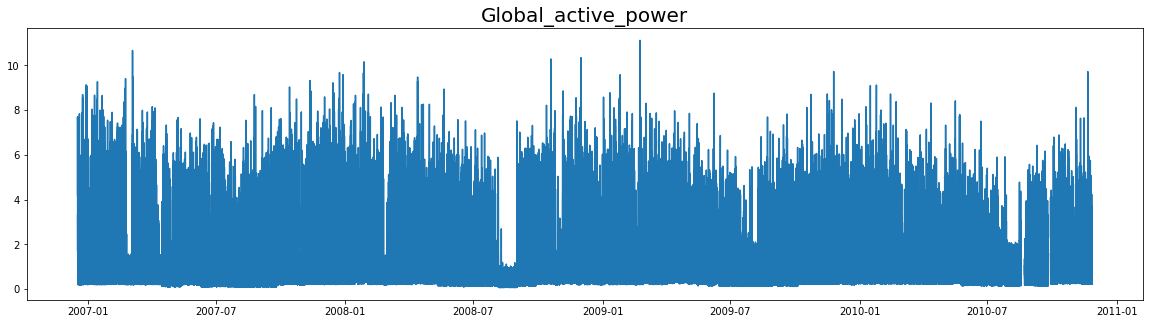

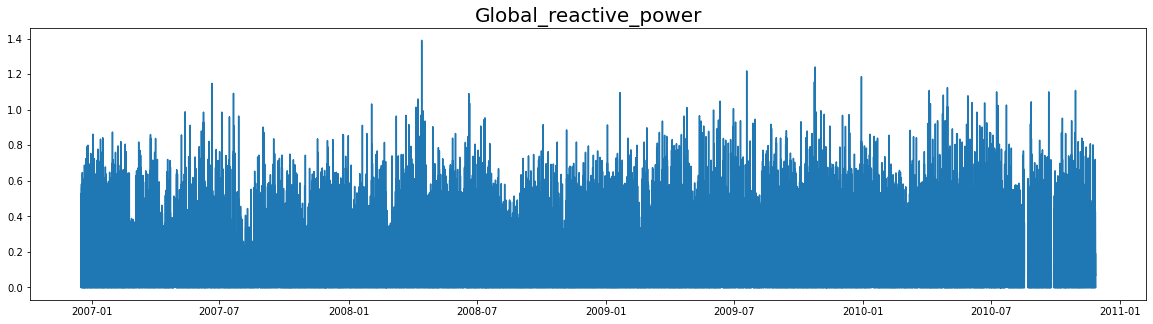

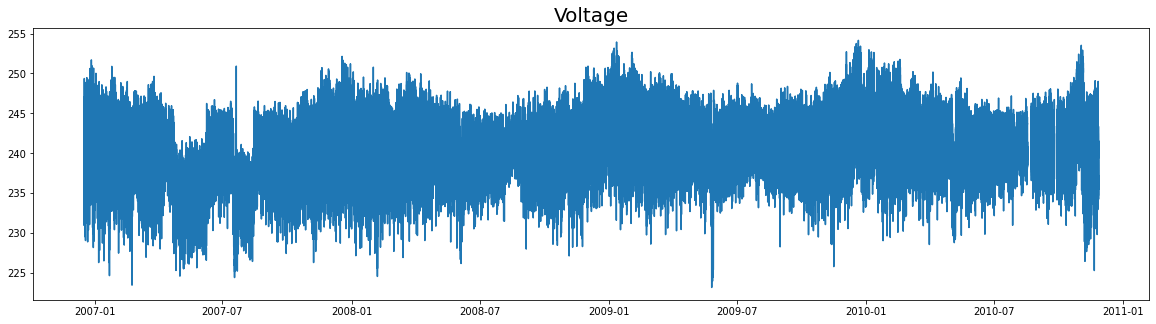

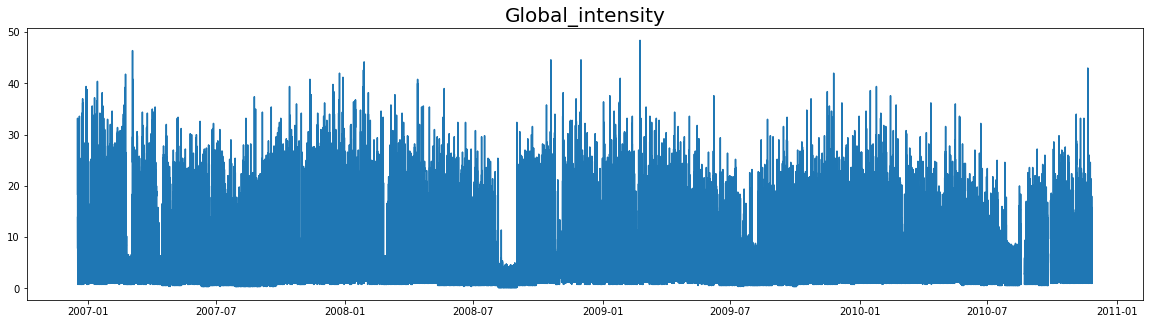

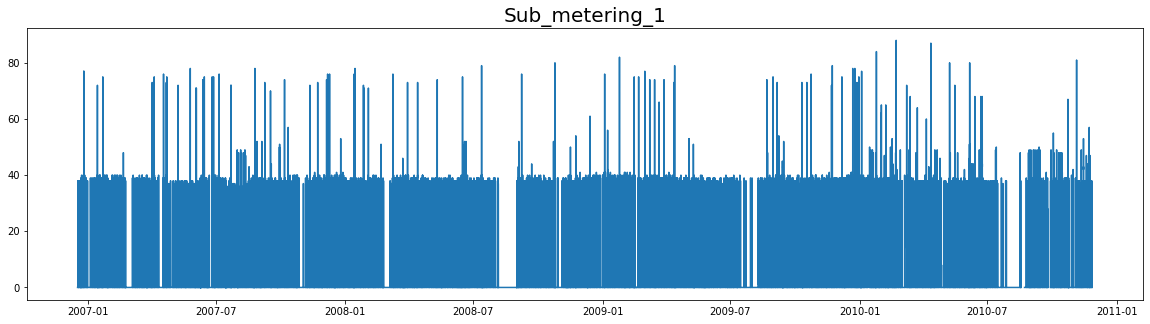

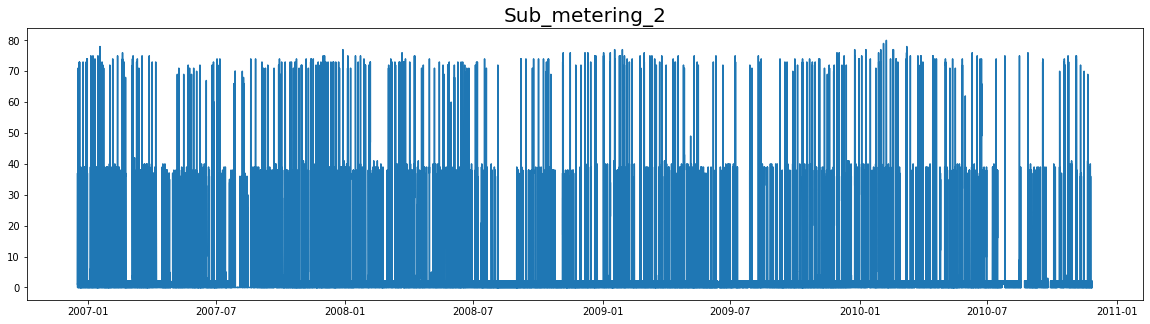

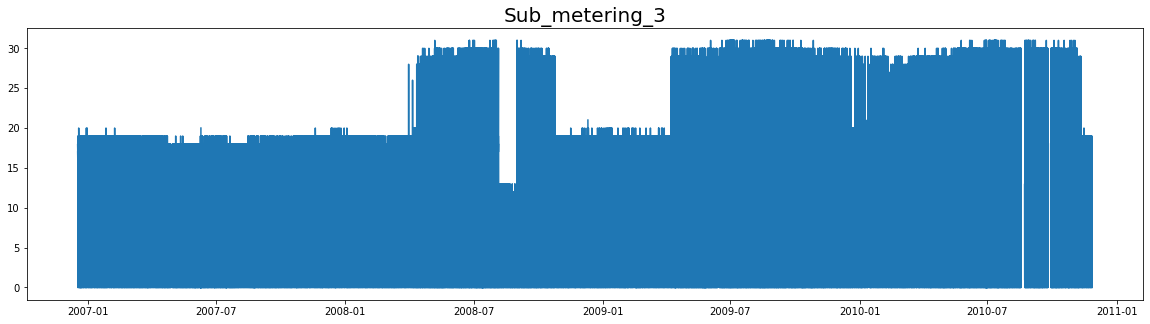

In [12]:
for col in df.columns:
    plt.figure(figsize=(20,5))
    plt.title(col,fontsize=20)
    plt.plot(df[col])

In [13]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
df.shape,df.count()

((2075259, 7), Global_active_power      2049280
 Global_reactive_power    2049280
 Voltage                  2049280
 Global_intensity         2049280
 Sub_metering_1           2049280
 Sub_metering_2           2049280
 Sub_metering_3           2049280
 dtype: int64)

In [15]:
#replace nan with mean value
df.columns.values

array(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'], dtype=object)

In [16]:
num_cols = len(df.columns.values)

In [18]:
num_cols

7

In [21]:
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date-Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


<h1>Missing value mean으로 채우기</h1>

In [25]:
for col in range(num_cols):
    df.iloc[:,col] = df.iloc[:,col].fillna(df.iloc[:,col].mean())

In [27]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [29]:
active_power_df = df['Global_active_power'].copy()

In [30]:
active_power_df[0:1440]

Date-Time
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2006-12-17 17:19:00    3.808
2006-12-17 17:20:00    3.580
2006-12-17 17:21:00    3.370
2006-12-17 17:22:00    3.130
2006-12-17 17:23:00    3.238
Name: Global_active_power, Length: 1440, dtype: float64

In [35]:
active_power_df

Date-Time
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64

In [40]:
df[0:1]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date-Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
